# Data Visualization exploration

In [27]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
from scipy import stats



# random sample consimment between runs
import random



%matplotlib inline


In [5]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp


# binarized data

In [ ]:

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)

    


In [ ]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)


In [ ]:


for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

omc_it_mm_all = pd.concat(omc_it_mm)
omc_it_st_all = pd.concat(omc_it_st)

omc_pt_mm_all = pd.concat(omc_pt_mm)
omc_pt_st_all = pd.concat(omc_pt_st)

In [ ]:
# need to change type values so that can visualize on heatmap

# change type so .25,.5,.75
mm_type_col = omc_mm_all['type']
mm_replace = np.where(mm_type_col==1000, 0.75, mm_type_col)
mm_replace = np.where(mm_replace==100, 0.5, mm_replace)
mm_replace = np.where(mm_replace==10, 0.25, mm_replace)
omc_mm_all['type'] = mm_replace

# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

print(omc_mm_all.shape)
print(omc_st_all.shape)
omc_mm_all.columns

In [ ]:
plot = omc_mm_all #.sample(1000, random_state=10)

# sort by cell type
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)


In [ ]:
plot = omc_st_all #.sample(1000, random_state=10)

# sort by cell type
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=orange_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)


# count data


In [6]:
#### load data
with open(in_path +'M194_M220_OMC_count4.pkl', 'rb') as f:
    omc_count = pickle.load(f)

In [29]:
omc_values = []
for i in range(num_samples):
    values = omc_count[i].values
    flat = values.flatten() # make single array
    # nzeros = flat.nonzero() # drop zeros to find range
    # omc_values.append(nzeros)
    omc_values.append(flat)
1


1

Text(0.5, 0.98, 'With zeros')

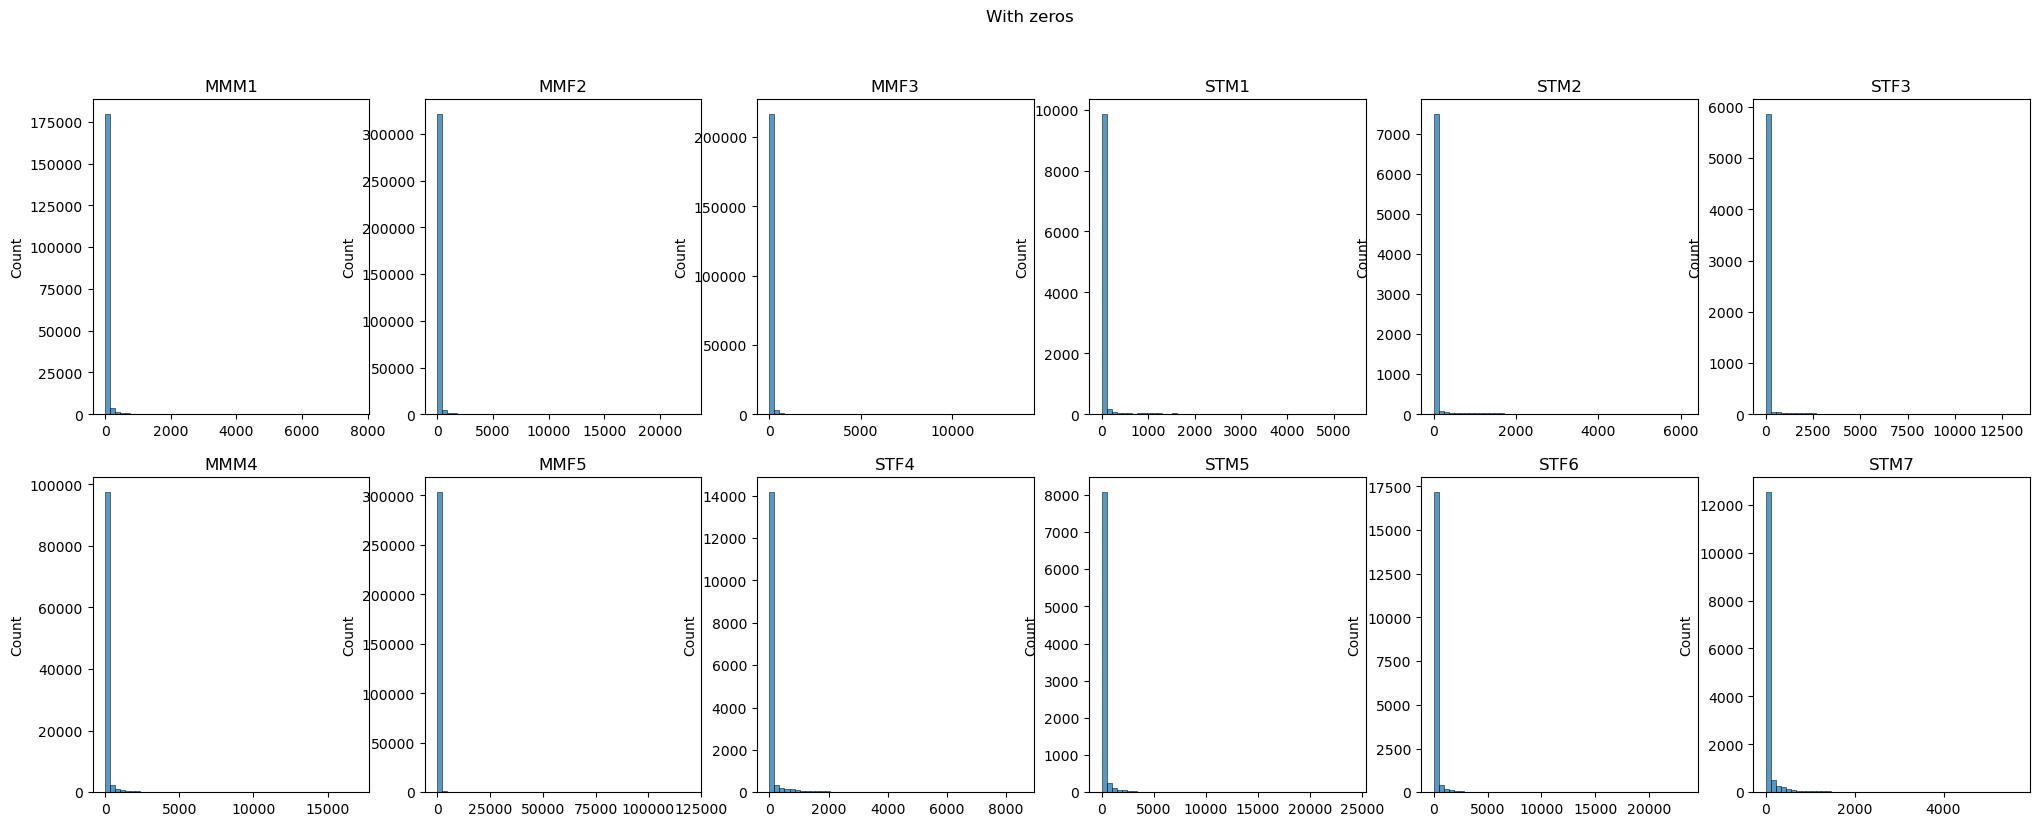

In [87]:
# plot histogram of count values
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    sns.histplot(omc_values[i], bins = 50, legend=False, ax=ax)
    ax.set_title(mice[i])
    i+=1
fig.suptitle("With zeros")

Text(0.5, 0.98, 'Without zeros')

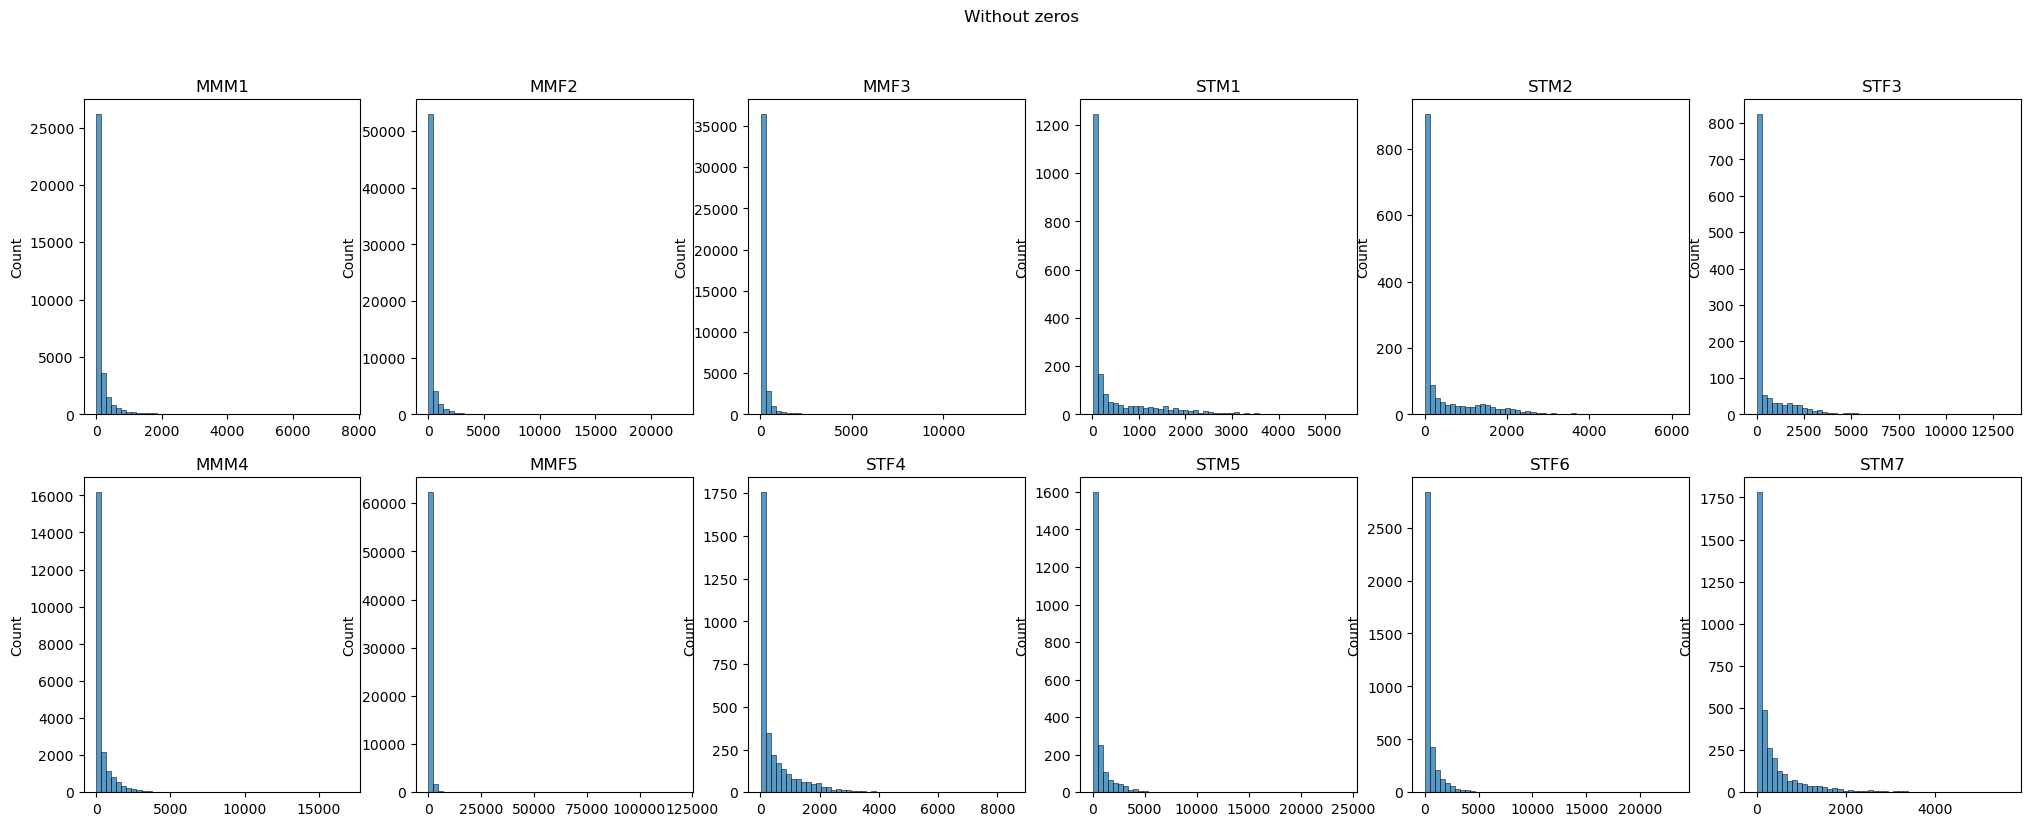

In [72]:
# plot = []
# for i in range(num_samples):
#     plot.append(omc_values[i].nonzero())

# plot histogram of count values
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    idx = omc_values[i].nonzero()
    plot = omc_values[i][idx]
    sns.histplot(plot, bins = 50, legend=False, ax=ax)
    ax.set_title(mice[i])
    i+=1
fig.suptitle("Without zeros")



In [83]:
# use min/max scaling to get all count values within same range
# all min is 0, so formula (x-xmin/xmax-xmin) becomes (x/xmax)
# scale w/ data that includes 0 (?)
omc_scaled = []
for i in range(num_samples):
    df = omc_count[i].copy()
    max_c = df.values.flatten().max().max() # get max value for each brain
    df_scaled = df/max_c * 1000 # normalize to max and scale by 1000 so numbers are reasonable/interpretable
    omc_scaled.append(df_scaled)

,OB,OMCi,ACAi,OMCc,ACAc,AUD,STR,TH,HY,AMY,HIP,SNr,SCm,PG,PAG,RN
9,0.0,37.164952,0.0,0.000000,0.0,0.0,9.385089,0.000000,1.351453,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
16,0.0,240.333358,0.0,7.432990,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
26,0.0,108.566709,0.0,0.976049,0.0,0.0,1.201291,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
30,0.0,68.473609,0.0,4.054358,0.0,0.0,1.126211,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
41,0.0,202.192357,0.0,3.378632,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0.0,27.554621,0.0,0.000000,0.0,0.0,2.177341,0.976049,0.450484,0.0,0.0,0.0,0.0,0.525565,0.0,0.0
2923,0.0,25.827765,0.0,3.528793,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2925,0.0,2.853067,0.0,0.000000,0.0,0.0,0.675726,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2929,0.0,20.572115,0.0,0.000000,0.0,0.0,5.030408,1.351453,1.501614,0.0,0.0,0.0,0.0,0.375404,0.0,0.0


Text(0.5, 0.98, 'Scaled - Without zeros')

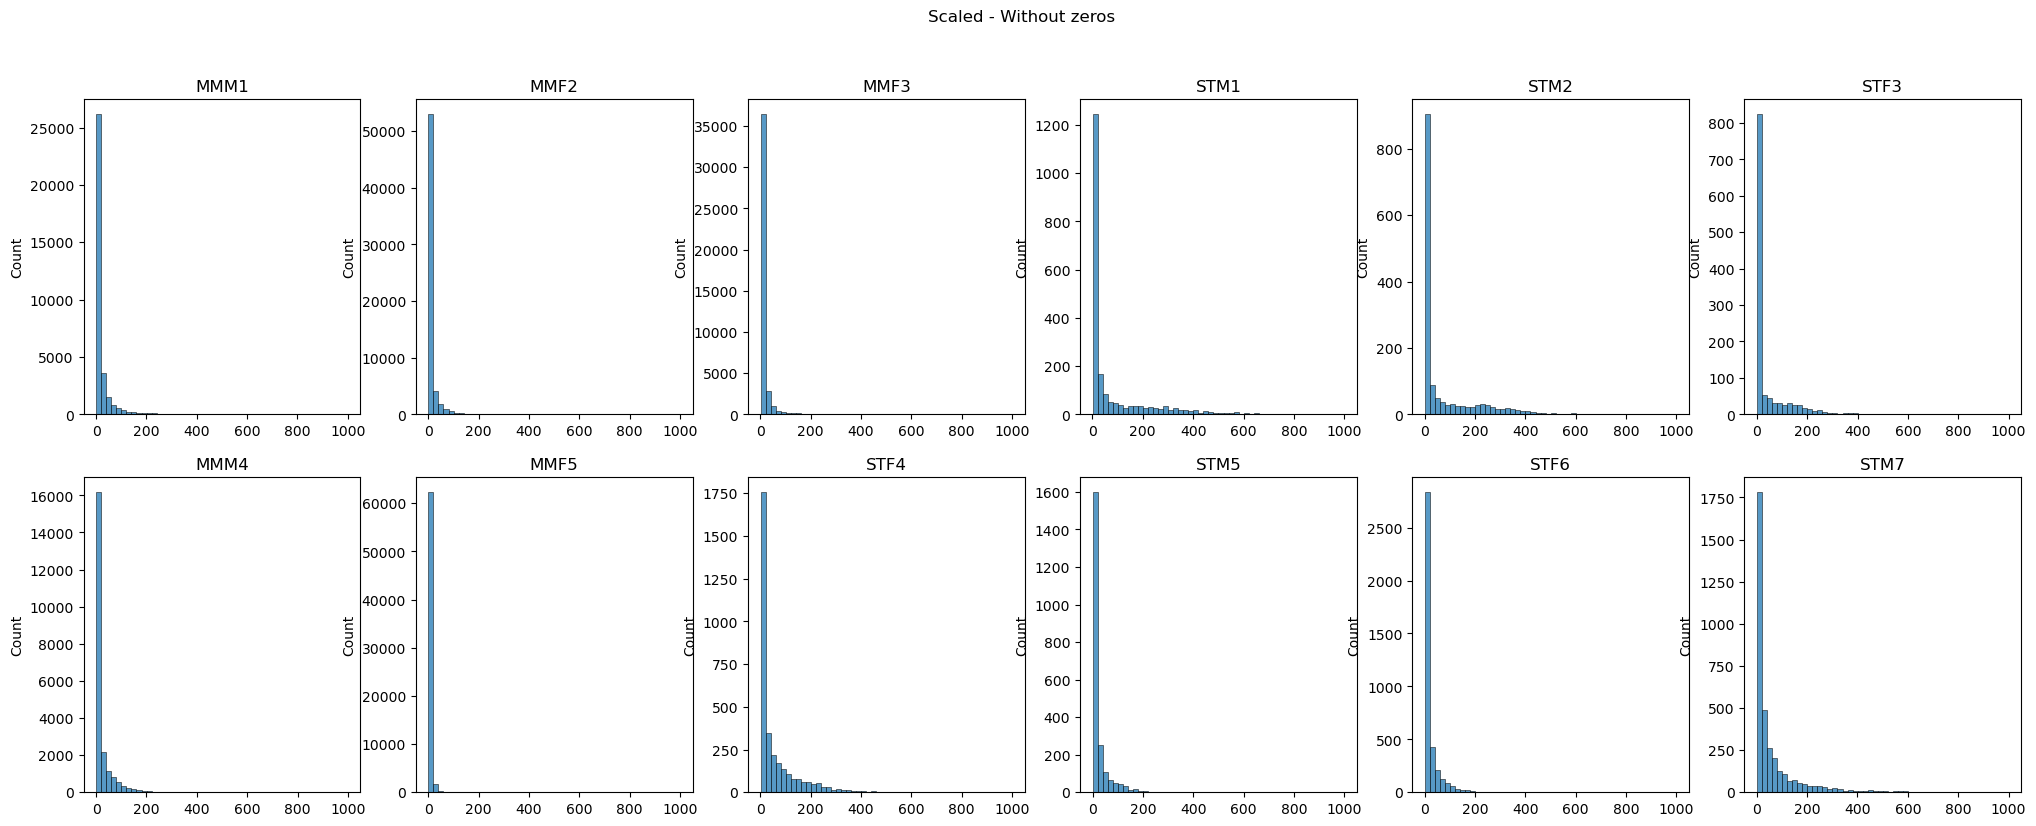

In [86]:
# plot = []
# for i in range(num_samples):
#     plot.append(omc_values[i].nonzero())

# plot histogram of count values
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_scaled[i]
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    sns.histplot(plot, bins = 50, legend=False, ax=ax)
    ax.set_title(mice[i])
    i+=1
fig.suptitle("Scaled - Without zeros")



# combine datasets and plot
Not perfect yet, need to scale median value??? but decided to move on

In [95]:
omc_mm = []
omc_st = []
for i in range(num_samples):
    if species[i] == "MMus":
        omc_mm.append(omc_scaled[i])
    elif species[i] == "STeg":
        omc_st.append(omc_scaled[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

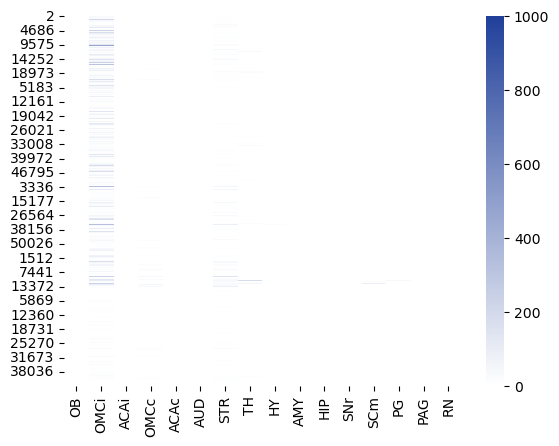

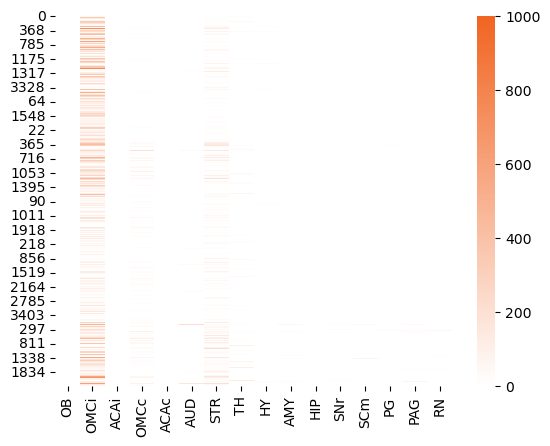

In [99]:
sns.heatmap(omc_mm_all, cmap=blue_cmp)
plt.show()
sns.heatmap(omc_st_all, cmap=orange_cmp)
plt.show()